In [2]:
import torch
import torch.nn as nn


# EX1

![image.png](attachment:image.png)

In [8]:

# CNN 아키텍처 구성을 위한 클래스 정의
class CNN(nn.Module):
    def __init__(self, num_classes):
        super(CNN, self).__init__()

        # Convolutional Layer
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3, stride=1, padding=1)
        self.relu = nn.ReLU()
        self.maxpool = nn.MaxPool2d(kernel_size=2, stride=2)
        
        # Fully Connected Layer
        self.fc1 = nn.Linear(in_features=16 * 14 * 14, out_features=64)
        self.fc2 = nn.Linear(in_features=64, out_features=num_classes)

    def forward(self, x):
        # Convolutional Layer
        print(f"start conv: {x.shape}")
        x = self.conv1(x)
        print(f"after conv: {x.shape}")
        x = self.relu(x)
        print(f"after relu: {x.shape}")
        x = self.maxpool(x)
        print(f"after maxpooling: {x.shape}")
        
        # Flatten
        x = x.view(x.size(0), -1)
        
        # Fully Connected Layer
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        
        return x


In [12]:
"""
input = (1,1,28,28)
conv2 -> (1,16,28,28)
ReLu -> 유지
Maxpooling2d (1,1,14,14)
Faltten -> 3차원->2차원 (1, 16, 14, 14)의 출력을 (1, 16 x 14 x 14)인 (1, 3136)으로 변환
f1 -> 특성 수가 3136이고 출력 특성 수가 64인 Fully Connected 레이어-> (1, 64)
f2 -> 특성 수 64 ->(1,10)

"""

'\ninput = (1,1,28,28)\nconv2 -> (1,16,28,28)\nReLu -> 유지\nMaxpooling2d (1,1,14,14)\nFaltten -> 3차원->2차원 (1, 16, 14, 14)의 출력을 (1, 16 x 14 x 14)인 (1, 3136)으로 변환\nf1 -> 특성 수가 3136이고 출력 특성 수가 64인 Fully Connected 레이어-> (1, 64)\nf2 -> 특성 수 64 ->(1,10)\n\n'

In [10]:
# 입력 데이터 생성 (batch_size=1)
input_size = (1, 28, 28)  # MNIST 이미지의 채널, 높이, 너비
input_data = torch.randn((1,) + input_size)
print(input_data.shape)

torch.Size([1, 1, 28, 28])


In [11]:

# 모델 생성 및 MNIST 데이터셋에 맞게 입력 크기 설정
model = CNN(num_classes=10)


# 모델에 입력 데이터 전달하여 출력 확인
output = model(input_data)
print(output.shape)  # 출력 크기 확인


start conv: torch.Size([1, 1, 28, 28])
after conv: torch.Size([1, 16, 28, 28])
after relu: torch.Size([1, 16, 28, 28])
after maxpooling: torch.Size([1, 16, 14, 14])
torch.Size([1, 10])


# EX2 - conv2개

In [27]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision.datasets import MNIST
from torchvision import transforms
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [32]:

# CNN 아키텍처 구성을 위한 클래스 정의
class CNN2(nn.Module):
    def __init__(self):
        super(CNN2, self).__init__()

        # Convolutional Layer
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3, stride=1, padding=1)
        self.relu = nn.ReLU()
        self.maxpool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(16,32, kernel_size=3, stride=1, padding=1)

        # Fully Connected Layer
        self.fc = nn.Linear(32*7*7, 10)
        

    def forward(self, x):
        # Convolutional Layer
        x = self.conv1(x)
        x = self.relu(x)
        x = self.maxpool(x)
        x = self.conv2(x)
        x = self.relu(x)
        x = self.maxpool(x)
        
        #flatten
        x = x.view(x.size(0),-1)
        x = self.fc(x)
        

        
        return x

In [33]:
"""
start conv: torch.Size([64, 1, 28, 28])
after conv: torch.Size([64, 16, 28, 28])
after relu: torch.Size([64, 16, 28, 28])
after maxpooling: torch.Size([64, 16, 14, 14])
after conv2: torch.Size([64, 32, 14, 14])
after maxpooling: torch.Size([64, 32, 7, 7])
torch.Size([64, 1568])
flatten : torch.Size([64, 10])

"""

'\nstart conv: torch.Size([64, 1, 28, 28])\nafter conv: torch.Size([64, 16, 28, 28])\nafter relu: torch.Size([64, 16, 28, 28])\nafter maxpooling: torch.Size([64, 16, 14, 14])\nafter conv2: torch.Size([64, 32, 14, 14])\nafter maxpooling: torch.Size([64, 32, 7, 7])\ntorch.Size([64, 1568])\nflatten : torch.Size([64, 10])\n\n'

In [34]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

torch.Size([64])
torch.Size([64])
torch.Size([64])
torch.Size([64])
torch.Size([64])
torch.Size([64])
torch.Size([64])
torch.Size([64])
torch.Size([64])
torch.Size([64])
torch.Size([64])
torch.Size([64])
torch.Size([64])
torch.Size([64])
torch.Size([64])
torch.Size([64])
torch.Size([64])
torch.Size([64])
torch.Size([64])
torch.Size([64])
torch.Size([64])
torch.Size([64])
torch.Size([64])
torch.Size([64])
torch.Size([64])
torch.Size([64])
torch.Size([64])
torch.Size([64])
torch.Size([64])
torch.Size([64])
torch.Size([64])
torch.Size([64])
torch.Size([64])
torch.Size([64])
torch.Size([64])
torch.Size([64])
torch.Size([64])
torch.Size([64])
torch.Size([64])
torch.Size([64])
torch.Size([64])
torch.Size([64])
torch.Size([64])
torch.Size([64])
torch.Size([64])
torch.Size([64])
torch.Size([64])
torch.Size([64])
torch.Size([64])
torch.Size([64])
torch.Size([64])
torch.Size([64])
torch.Size([64])
torch.Size([64])
torch.Size([64])
torch.Size([64])
torch.Size([64])
torch.Size([64])
torch.Size([64

KeyboardInterrupt: 

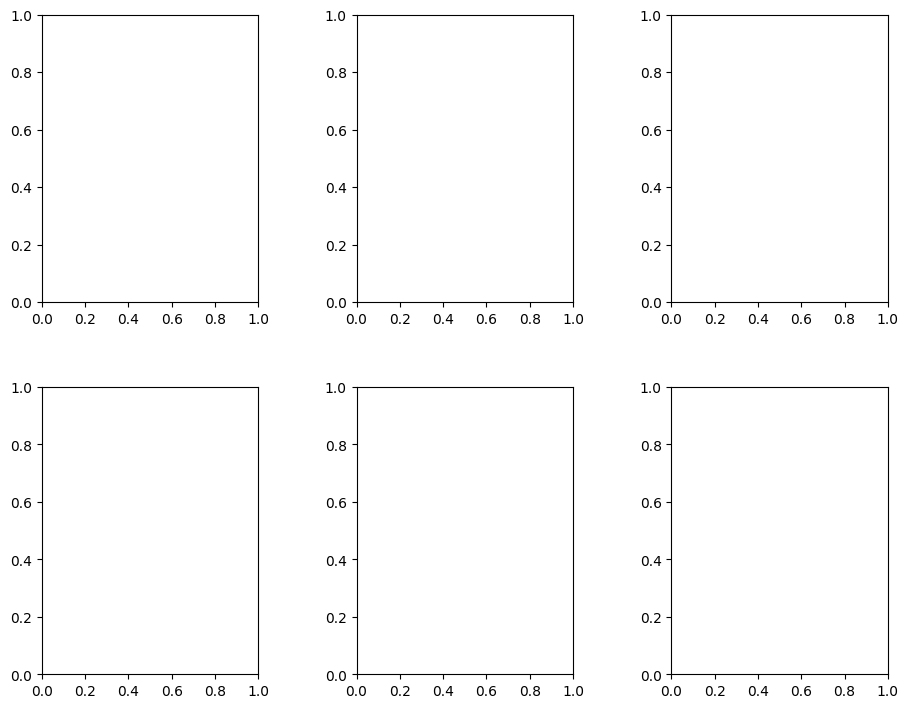

In [35]:
if __name__ == "__main__":
    train_dataset = MNIST('./train', train=True, transform=transforms.ToTensor(), download=True)
    test_dataset = MNIST('./train', train=False, transform=transforms.ToTensor())
    # train_dataset이 만들어지면서 download=True 옵션 때문에 지정한 ./train 경로에 다운로드됨
    # test_dataset은 상기 경로에 다운로드된 데이터 중 t10k로 시작하는 데이터를 train=False 옵션으로 사용하게 됨
    # transform은 현재 텐서화 이외에는 적용하지 않음

    batch_size = 64
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=batch_size)
    # train 데이터로더는 shuffle 옵션을 True로 지정
    # test 데이터로더는 shuffle 옵션이 필요 없음

    model = CNN2().to(device)
    # 모델을 적절한 장치에 넘김

    criterion = nn.CrossEntropyLoss()
    # 다중 클래스 분류 문제이므로, Cross Entropy 손실 함수 사용
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    # lr 초기값은 설계자의 임의 지정

    

    fig, axs = plt.subplots(2, 3, figsize=(10, 8))
    fig.tight_layout(pad=4.0)
    axs = axs.flatten()
    # 시각화를 위한 그리드 설정

    epoch_losses = []
    # 오차 강하 그래프를 그리기 위한 오차를 담을 list

    num_epochs = 10
    for epoch in range(num_epochs):
        model.train()
        # 모델을 학습 모드로 설정
        running_loss = 0.0
        # 트레인 로더를 한번 순회한 오차값

        for images, labels in train_loader:
            images = images.to(device)
            labels = labels.to(device)
            # loader에서 받아온 image와 label을 적절한 장치에 넘김
            print(labels.shape)

            optimizer.zero_grad() # 그래디언트 초기화

            outputs = model(images)
            # 모델에 받아온 images를 입력 후 예측값인 outputs를 받아옴

            loss = criterion(outputs, labels)
            # 실제 정답인 labels와 상기 예측값인 outputs를 손실함수로 대조하여 오차 출력

            loss.backward()
            optimizer.step()
            # 역전파 이후 optimizer가 가중치 업데이트

            running_loss += loss.item() * images.size(0)
        
        epoch_loss = running_loss / len(train_dataset)
        epoch_losses.append(epoch_loss)
        # epoch 순회마다 발생한 loss를 리스트에 추가

        print(f"Epoch {epoch+1} / {num_epochs}, Loss : {epoch_loss:.4f}")
        # Epoch 순회마다 발생한 loss 출력

    #     if epoch == 0:
    #         weights = model.conv1.weight.detach().cpu().numpy()
    #         axs[0].imshow(weights[0, 0], cmap='coolwarm')
    #         axs[0].set_title("Conv1 Weights")
    #         divider = make_axes_locatable(axs[0])
    #         cax = divider.append_axes('right', size='5%', pad=0.05)
    #         plt.colorbar(axs[0].imshow(weights[0, 0], cmap='coolwarm'), cax=cax)
    #         # 첫번째 합성곱 레이어의 가중치 시각화

    #         weights = model.conv2.weight.detach().cpu().numpy()
    #         axs[1].imshow(weights[0, 0], cmap='coolwarm')
    #         axs[1].set_title("Conv2 Weights")
    #         divider = make_axes_locatable(axs[1])
    #         cax = divider.append_axes('right', size='5%', pad=0.05)
    #         plt.colorbar(axs[1].imshow(weights[0, 0], cmap='coolwarm'), cax=cax)
    #         # 두번째 합성곱 레이어의 가중치 시각화

    #         if model.conv1_output is not None:
    #             conv1_output = model.conv1_output.detach().cpu().numpy()
    #             axs[2].imshow(weights[0, 0], cmap='coolwarm')
    #             axs[2].set_title("Conv2 Weights")
    #             divider = make_axes_locatable(axs[2])
    #             cax = divider.append_axes('right', size='5%', pad=0.05)
    #             plt.colorbar(axs[2].imshow(conv1_output[0, 0], cmap='coolwarm'), cax=cax)
    #             # 첫번째 합성곱 레이어의 특징값 시각화

    #         if model.conv2_output is not None:
    #             conv2_output = model.conv2_output.detach().cpu().numpy()
    #             axs[3].imshow(weights[0, 0], cmap='coolwarm')
    #             axs[3].set_title("Conv2 Weights")
    #             divider = make_axes_locatable(axs[3])
    #             cax = divider.append_axes('right', size='5%', pad=0.05)
    #             plt.colorbar(axs[3].imshow(conv2_output[0, 0], cmap='coolwarm'), cax=cax)
    #             # 두번째 합성곱 레이어의 특징값 시각화

    #     axs[4].plot(range(epoch+1), epoch_losses)
    #     axs[4].set_title('training_loss')
    #     axs[4].set_xlabel('Epoch')
    #     axs[4].set_ylabel('Loss')
    #     # epoch loss 그래프

    # plt.show()


In [ ]:
# 이하 모델 평가 코드
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)
        # outputs가 10개의 확률함수로 나타나게 될 것
        # -> outputs에 나타난 10개 확률 중 가장 높은 값을 취함 -> 모델이 예측한 숫자
        temp, predicted = torch.max(outputs.data, 1)
        # 출력 튜플의 두번째 값 -> 모델이 예측한 라벨

        total += labels.size(0)
        # 이번 test loader에 올라온 label의 숫자를 총 숫자에 합산함
        correct += (predicted == labels).sum().item()
        # predicted와 labels 둘 다 일정 갯수의 행렬 형태로 나올 것
        # (predicted == labels) -> 같은 값은 행렬 내에서 1, 아니면 0 -> ex) [1. , 0. , 1. , 1. , ...]
        # 위에서 얻은 1, 0, 으로 이루어진 행렬의 합을 구함 -> sum()

accuracy = (correct / total) * 100
print(f"Test Accuracy: {accuracy:.2f} %")